# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

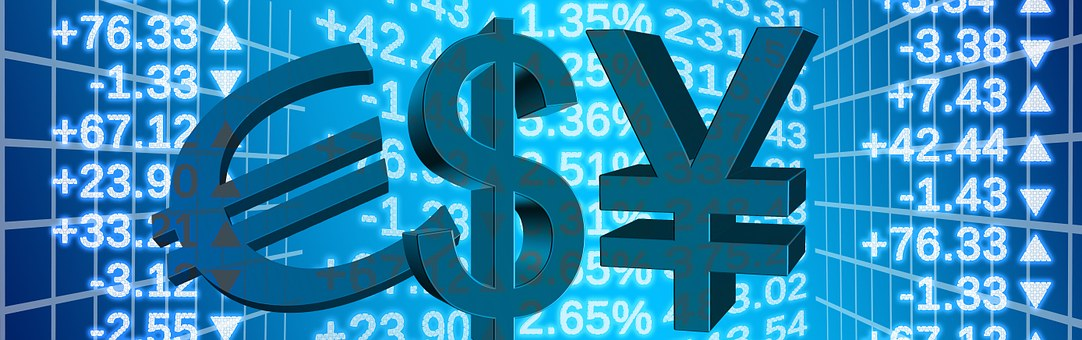

In [2]:
from IPython.display import Image
Image(filename='./img/imagenStock.jpg' ,  width= 1280)

### Carga de bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

### Carga del dataset

In [4]:
df = pd.read_csv("./inputs/dataset.csv", index_col=0, parse_dates=True, dayfirst= True)
df.head()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
1997-07-02,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.41992,NaN,1199.06,4333.899902,0.9998,1.0767,1.6670,1.1223,114.52,7.7472,8.3210,NaN
1997-07-03,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.41016,15055.70020,1150.62,4323.459961,0.9994,1.0778,1.6885,1.1242,113.46,7.7445,8.3214,NaN
1997-07-04,837.950012,13494.0,NaN,NaN,4812.799805,3946.729980,2934.500000,19968.00000,14823.00000,1159.34,4323.819824,0.9995,NaN,NaN,1.1230,NaN,NaN,NaN,NaN
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.16992,14858.59961,1096.82,4291.450195,0.9998,1.0779,1.6870,1.1226,112.60,7.7428,8.3218,NaN
1997-07-08,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.89063,14792.20020,1109.67,4306.390137,0.9999,1.0790,1.6885,1.1180,112.76,7.7436,8.3219,NaN


### Transformaciones 

Aquí incluir el código desarrollado en TP2 para obtener las tasas de retorno.

### Preparamos el ambiente para obtener la serie de retornos de los índices.

In [5]:
df = df[df.index.dayofweek < 5]

df_interpolate = df.copy()

for col in df.columns:
    
    df_temp = df[[col]]
    df_temp['new_index'] = np.array(range(len(df_temp)))
    
    df_temp_dropna=df_temp.dropna()

    y = np.array(df_temp[col])
    x = np.array(df_temp.new_index)

    y_dropna = np.array(df_temp_dropna[col])
    x_dropna = np.array(df_temp_dropna.new_index)
    
    f_lineal = interp1d(x_dropna, y_dropna, fill_value="extrapolate")
    f_cubic = interp1d(x_dropna, y_dropna, kind='cubic', fill_value="extrapolate")

    y_lineal = f_lineal(x)
    y_cubic = f_cubic(x)
    
    df_interpolate[col] = y_cubic
    del df_temp, df_temp_dropna, x, y, x_dropna, y_dropna, f_lineal, f_cubic, y_lineal, y_cubic

In [6]:
df = df_interpolate.copy()

In [7]:
cepo_1 = (df.index >= '2011-10-28') & (df.index <= '2015-12-16')
cepo_2 = (df.index >= '2019-09-01') & (df.index <= '2020-05-08')
cepo = (cepo_1 | cepo_2)
df['DEXARUS'][cepo] = df['DOLAR_BLUE']

df_us = pd.DataFrame(index=df.index)
df_us['MERV'] = df['MERV'] / df['DEXARUS'] # Divido porque el par esta en X/US
df_us['BVSP'] = df['BVSP'] / df['DEXBZUS']
df_us['FTSE'] = df['FTSE'] * df['DEXUSUK'] # Multiplico porque el par esta en US/X
df_us['GDAXI'] = df['GDAXI'] * df['DEXUSEU']
df_us['FCHI'] = df['FCHI'] * df['DEXUSEU']
df_us['N225'] = df['N225'] / df['DEXJPUS']
df_us['HSI'] = df['HSI'] / df['DEXHKUS']
df_us['SSEC'] = df['SSEC'] / df['DEXCHUS']
# df_us['BSESNUS'] = df['BSESN'] / df['DEX?'] Falta el DEX de rupias indias? 

#A continuación agregamos los índices GSPC y NDX.
df_us['GSPC'] = df['GSPC']
df_us['NDX'] = df['NDX']

In [8]:
df_ret = df_us.pct_change().replace(np.nan,0)

df_ret.head()

,MERV,BVSP,FTSE,GDAXI,FCHI,N225,HSI,SSEC,GSPC,NDX
FECHA,,,,,,,,,,
1997-07-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997-07-03,0.009298,0.000863,0.030016,0.020393,0.011161,0.005594,-0.060765,-0.040444,0.014258,0.010851
1997-07-04,0.007729,0.015781,-0.003102,0.000707,-0.001918,-0.001982,-0.015259,0.007547,-0.003921,0.000044
1997-07-07,0.004162,0.000452,-0.002136,0.013985,0.004140,-0.011247,0.002421,-0.053943,-0.001231,0.004538
1997-07-08,0.005412,0.007489,-0.009971,0.002557,-0.010145,0.006118,-0.004572,0.011704,0.007180,0.014904


# Trabajo Práctico N°5: Aprendizaje No Supervisado

## Introducción

En los prácticos previos, realizamos ciertos análsis exploratorios y aplicamos algunos modelos predictivos de aprendizaje supervisado. Prestamos espacial atención a dichos modelos, porque justamente ese era el objetivo central de la mentoría.

En este práctico, aplicaremos métodos de aprendizaje no supervisado. Dichas metodologías en muchos casos son aplicadas antes de las metodologías de aprendizaje supervisado, dado que frecuentemente nos permiten obtener algunos insumos útiles para las últimas.

Entre otros métodos, podemos destacar los correspodientes a clustering y los de reducción de dimensión (como en el caso de componentes principales). Algunas de las metodologías despliegan su máximo potencial cuando se dispone de muchas series. Veremos que ocurre con nuestro humilde dataset!

Finalmente se incluyen algunos incisos adicionales opcionales que exceden al cursado de la diplomatura pero son muy interesantes!


## Consignas


A partir de las tasas de rendimiento de los índices, se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales y consultar otras fuentes. 

**Se pide:**

Para las tasas de retorno:

#### Clustering

* Aplicar el algoritmo Mean Shift. En este caso se pueden usar los criterios de información como guía para determinar la cantidad óptima de clusters.

* Aplicar k-means. Seleccionar el valor de k de acuerdo a la inercia o el análisis de siluetas.

* Aplicar al menos un algoritmo de clustering jeráquico.

* Comentar los resultados brevemente.

#### Embeddings

* Aplicar el análisis de componentes principales con las tasas de rendimiento y con las tasas de rendimiento previamente estandarizadas.

* Comentar los resultados brevemente.


**Opcional: (pero muy recomendado!)**

* Usar la medida de distancia __dynamic time warping__ para agrupar por k-means y comparar con lo obtenido con la métrica euclídea. [Código y algunos detalles](https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3)

* Aplicar __factores dinámicos__ para ver si las tasas de retorno se pueden resumir en uno o unos pocos constructos subyacentes. 
[Código y algunos detalles](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_dfm_coincident.html) 

## Fecha de entrega

- __Versión preliminar: 22/11__ 

- __Version final: 29/11__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


# CLUSTERING

## Dandole forma al Dataset

In [29]:
from tslearn.utils import to_time_series_dataset

time_series_1 = df_ret["MERV"].tolist()
time_series_2 = df_ret["BVSP"].tolist()
time_series_3 = df_ret["FTSE"].tolist()
time_series_4 = df_ret["GDAXI"].tolist()
time_series_5 = df_ret["FCHI"].tolist()
time_series_6 = df_ret["N225"].tolist()
time_series_7 = df_ret["HSI"].tolist()
time_series_8 = df_ret["SSEC"].tolist()
time_series_9 = df_ret["GSPC"].tolist()
time_series_10 = df_ret["NDX"].tolist()
formatted_dataset = to_time_series_dataset([time_series_1, time_series_2, time_series_3, time_series_4, time_series_5, time_series_6,
                                            time_series_7, time_series_8, time_series_9, time_series_10])
print(formatted_dataset.shape)

(10, 5963, 1)


## Algoritmo K means con distancia Euclidea

In [33]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

#n_clusters = 2
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean")
labels = km.fit_predict(formatted_dataset)
silhouette_score(formatted_dataset, labels, metric="euclidean")

In [10]:
print(labels)

[0 1 0 0 0 0 0 0 0 0]


In [11]:
#n_clusters = 3

km = TimeSeriesKMeans(n_clusters=3, metric="euclidean")
labels = km.fit_predict(formatted_dataset)
silhouette_score(formatted_dataset, labels, metric="euclidean")

0.17594736235498667

In [12]:
print(labels)

[0 2 2 2 2 1 1 1 2 2]


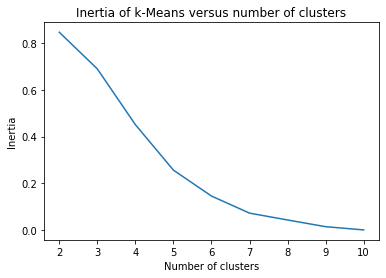

In [13]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [TimeSeriesKMeans(n_clusters=i+2, metric="euclidean").fit(formatted_dataset).inertia_ for i in range(10)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2, 11, step=1)) 
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

**Comentario**

En el último casos podemos ver que ubica al índice Merval como un cluster de un único índice. ¿Qué significa esto?
Por otro lado, cuando utilizamos el "método del codo" no hay un claro punto de quiebre, sin embargo, podríamos tomar a 7 (n_de_clusters=7) como dicho punto.

## Algoritmo Mean Shift

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwith = estimate_bandwidth(df_ret) 
print('Estimación de bandwith: ', bandwith, '\n')

ms = MeanShift(bandwidth=bandwith, bin_seeding=True)

ms.fit(df_ret)

clusters = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Estimación de bandwith:  0.05362307616783442 

Numero estimado de clusters para Mean Shift : 60


Text(0, 0.5, '# de instancias')

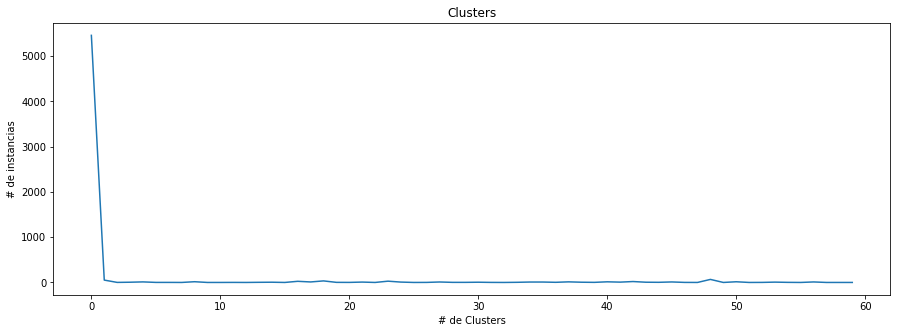

In [15]:
#Graficamos los clusters y el numero de elementos que componen cada uno

x = [i for i in range(n_clusters_)]
y = [(clusters==i).sum() for i in range(n_clusters_)]

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.title('Clusters')
plt.xlabel('# de Clusters')
plt.ylabel('# de instancias')

Text(0, 0.5, '# de instancias')

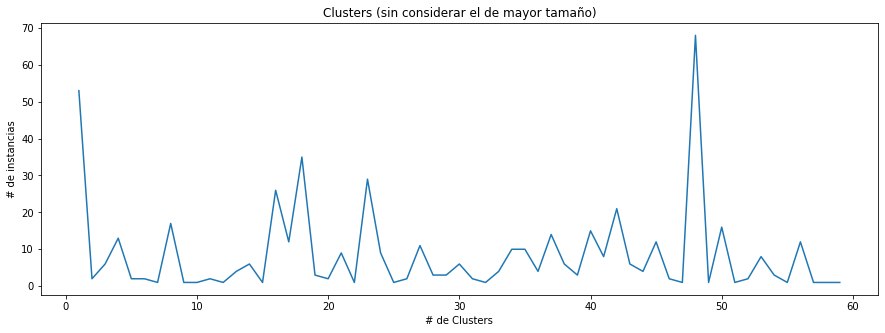

In [16]:
#Si extraemos el cluster de mayor tamaño
plt.figure(figsize=(15,5))
plt.plot(x[1:],y[1:])
plt.title('Clusters (sin considerar el de mayor tamaño)')
plt.xlabel('# de Clusters')
plt.ylabel('# de instancias')

**Comentario**

Cuando corremos el algoritmo mean shift sin ninguna estimación del bandwith, en la mayoría de los casos, obtenemos un único cluster. Mientras que al correrlo, con una estimación, obtenemos 60 clusters. En este último caso, pudimos ver que el primer cluster contiene 5461 instancias (91% de los datos), mientras que otros contienen un único punto. 

## Algoritmo K-means con la métrica Dynamic Time Warping¶

In [30]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(formatted_dataset)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=10,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=3, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-06, verbose=0)

In [31]:
labels2 = model.labels_
print(labels2)

[2 1 1 1 1 1 1 0 1 1]


In [34]:
silhouette_score(formatted_dataset, labels2, metric="dtw")

0.028938794580933836

Silhouette: Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. 
The silhouette score falls within the range [-1, 1]. The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect

In [35]:
print(model.inertia_)

0.37981351181503425


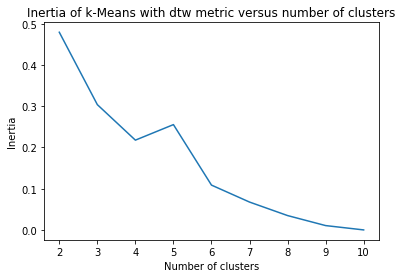

In [36]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [TimeSeriesKMeans(n_clusters=i+2, metric="dtw",  max_iter=10).fit(formatted_dataset).inertia_ for i in range(10)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2, 11, step=1)) 
plt.ylabel("Inertia")
plt.title("Inertia of k-Means with dtw metric versus number of clusters")
plt.show()

## Cluster Jerárquico

Creamos el dendograma para encontrar el número óptimo de clusters

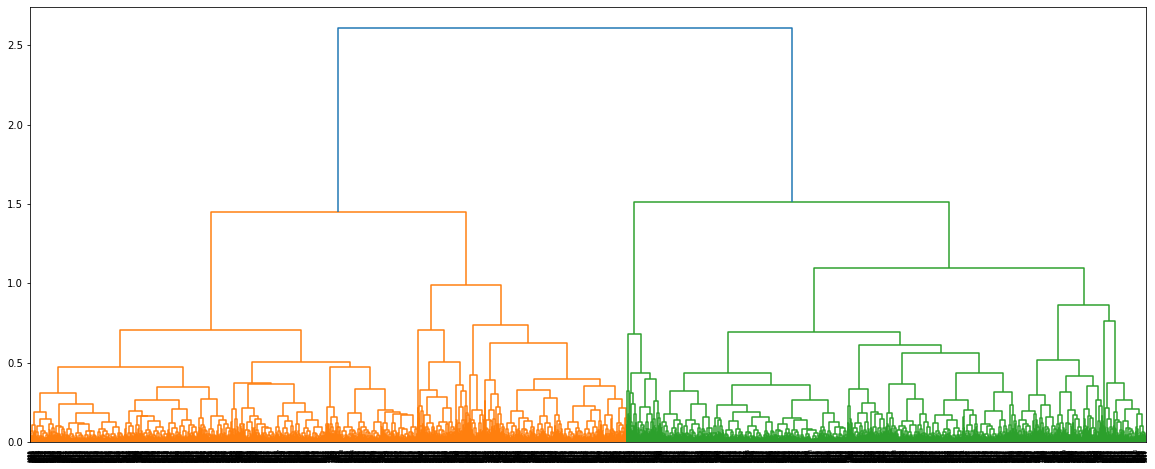

In [11]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,8))
dend = sch.dendrogram(sch.linkage(df_ret, method='ward'))
plt.show()

**Comentarios**

En el dendograma podemos observar que la distancia máxima la marca la línea azul oscuro que une los clusters naranja y verde, por lo que si realizamos el corte en esa zona obtenemos que el número de clusters es 2:

Con ello en mente, generamos los grupos con el método aglomerante utilizando la clase AgglomerativeClustering del paquete sklearn.cluster.

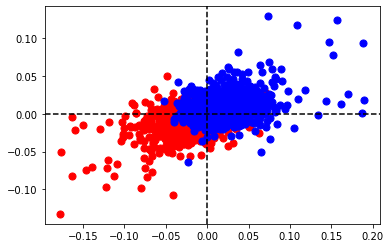

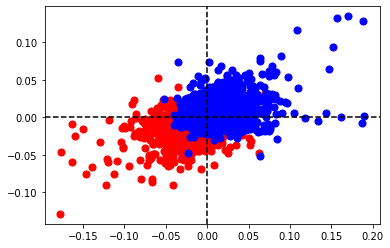

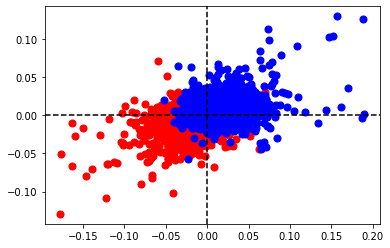

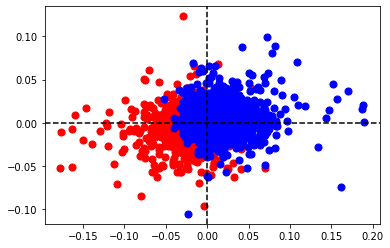

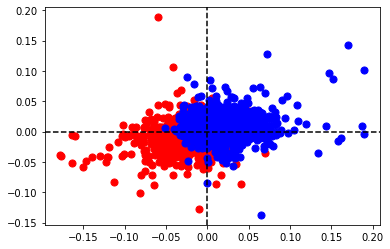

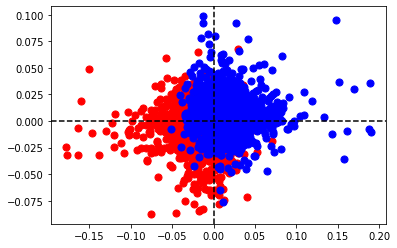

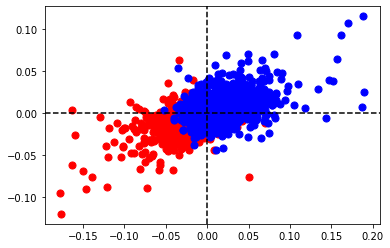

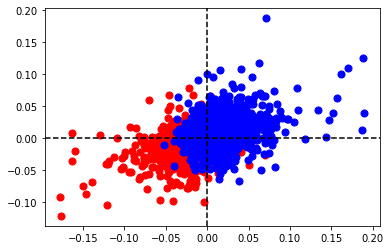

In [12]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 2, 
                                     linkage = 'ward') 

clustering_class = clustering.fit_predict(df_ret)

labels = clustering_class

#Graficamos los valores del índice MERV vs. los otros índices, para 2 clusters.
for i in range(1, df_ret.shape[1]-1):
    X = df_ret.iloc[:, [1, i+1]].values
    plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
    plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')

    plt.axhline(y=0, color = 'black', ls='--')
    plt.axvline(x=0, color = 'black', ls='--')
    plt.show()

**Comentarios**

Podemos decir que en el primer cluster (en rojo) se concentran los valores de los retornos de los índices negativos, es decir, los puntos para cuales ambos retornos fueron negativos. En en segundo cluster (en azul) podemos ver que contiene, en su mayoría, aquellos puntos donde los retornos de ambos índices fueron positivos.

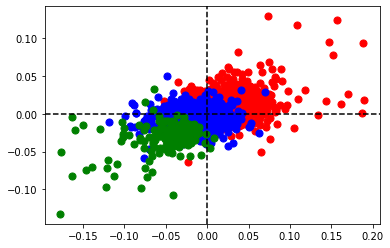

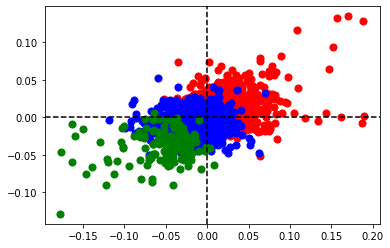

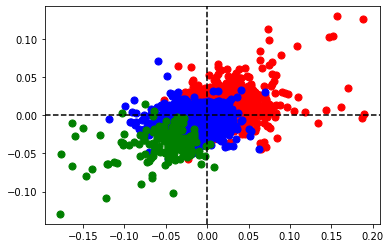

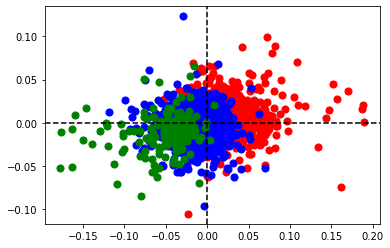

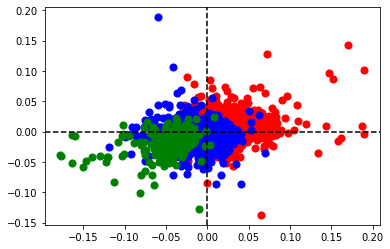

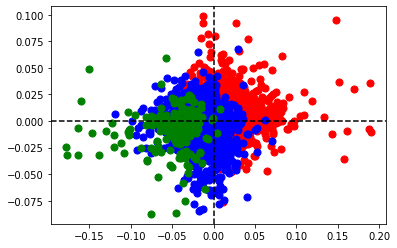

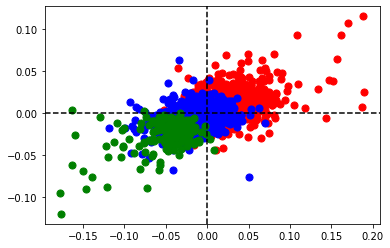

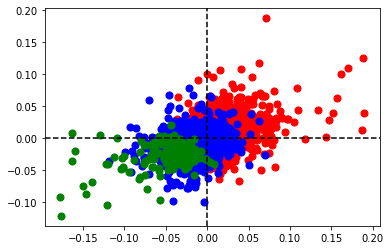

In [13]:
#Tomemos 3 clusters
clustering = AgglomerativeClustering(n_clusters = 3, 
                                     linkage = 'ward') 

clustering_class = clustering.fit_predict(df_ret)

labels = clustering_class

for i in range(1, df_ret.shape[1]-1):
    X = df_ret.iloc[:, [1, i+1]].values
    plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
    plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
    plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
 

    plt.axhline(y=0, color = 'black', ls='--')
    plt.axvline(x=0, color = 'black', ls='--')
    plt.show()

**Comentarios**

Si en lugar de tomar 2 clusters, tomamos 3, podemos ver una división entre:
- Ambos retornos son positivos (concetrados en el cluster rojo)
- Ambos retornos son negativos (concentrados en el cluster verde)
- Retornos "próximos a cero" ya sean positivos y/o negativos para ambos índices.

## Embedings

In [14]:
X = df_ret # Datos para proyectar
print('los datos tienen dimesión n = ',len(df_ret.columns))

los datos tienen dimesión n =  10


In [15]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) 

In [16]:
print(X_scaled[0:2])
X.head(2)

[[-0.0067049  -0.01321468 -0.00670008 -0.01853003 -0.0122197  -0.00820406
  -0.0122051  -0.01915543 -0.02225947 -0.03009711]
 [ 0.36603275  0.02181863  2.24345844  1.26758854  0.7077881   0.37040971
  -3.92712511 -2.69123942  1.14450192  0.58208078]]


,MERV,BVSP,FTSE,GDAXI,FCHI,N225,HSI,SSEC,GSPC,NDX
FECHA,,,,,,,,,,
1997-07-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997-07-03,0.009298,0.000863,0.030016,0.020393,0.011161,0.005594,-0.060765,-0.040444,0.014258,0.010851


In [17]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled)

# proporción de varianza
print('Proporción de varianza por componente: ', pca.explained_variance_ratio_)
print()
# proporción de varianza acumulada
print ('Proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())
print()

X_projected=pca.transform(X_scaled) #numpy array
print ('Tamaño de los datos: ', X_projected.shape)

Proporción de varianza por componente:  [0.44540764 0.15087467 0.10343499 0.08259906]

Proporción de varianza por componente acumulada:  [0.44540764 0.5962823  0.69971729 0.78231635]

Tamaño de los datos:  (5963, 4)


In [18]:
print (X_projected[0:5])

[[-4.52844004e-02  2.18026015e-04 -1.81290888e-02 -1.54264871e-02]
 [ 1.26524642e+00  3.41793090e+00 -2.72085019e+00 -9.83994070e-01]
 [-1.96905202e-01  3.90356153e-01  3.36308567e-01 -1.12484873e-01]
 [ 1.72147680e-02  1.95796425e+00 -1.91292906e+00 -1.62957095e+00]
 [ 1.71903975e-01  2.21464187e-01  1.36292117e+00  3.35082655e-01]]


In [19]:
pca_comp = pca.components_  #"composición" de las primeras componentes, 
print(pca_comp)  # el aporte/pesos de las variables: skills_ratings

[[ 0.2541473   0.34085853  0.39762589  0.4080981   0.40643378  0.15708312
   0.23791097  0.09877996  0.37183276  0.31637314]
 [ 0.11889936  0.11670241 -0.07370074 -0.00802246 -0.04598281 -0.52998224
  -0.51514173 -0.43869458  0.32287473  0.34882619]
 [ 0.31913125  0.23988561 -0.34598122 -0.37074603 -0.41231129  0.07102897
   0.15327002  0.45048723  0.24415057  0.34981261]
 [-0.63802351 -0.25684762  0.03959002  0.11379966  0.0835109  -0.32464898
  -0.0346295   0.53547514  0.20438668  0.26525419]]


In [20]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns

In [23]:
#Composición de los pesos de las dos primeras componentes principales.
data=[]

for i, (x,y) in enumerate(zip(pca_comp[0,:],pca_comp[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=12))
    data.append(graph)

layout = go.Layout(title="ACP - Indices Financieros",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [24]:
#Graficar índices usando las dos primeras componentes de PCA, proyectamos los datos en el espacio de dimensión 2**
bool_positive = ((df_ret>0).sum(axis=1) ==10) 
bool_negative =  ((df_ret>0).sum(axis=1) ==0) 


palette=['navy','#A2D5F2']  
data=[]

acp_positive =go.Scatter(x=X_projected[bool_positive,0], y=X_projected[bool_positive,1],name='Positive',
                      #text=df_ret.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[0],size=7),mode='markers+text')

acp_negative =go.Scatter(x=X_projected[bool_negative,0], y=X_projected[bool_negative,1],name='Negative',
                         #text=df_acp.loc[bool_no_crack,'Name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

data=[acp_positive,acp_negative]

layout = go.Layout(title="ACP - Indices Financieros",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

**Conclusiones**

- Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. En este caso, creo que encontramos algunos agrupamientos esperados.

- Hemos trabajamos con diferentes métodos de aprendizaje no supervisado, entre ellos clustering jerárquico y k-Means. Estos últimos son más eficientes para los conjuntos de datos grandes, sin embargo, el clustering jerárquico no requiere que se especifique el número de clusteres.  Otro detalle importante es que el clustering jerárquico siempre genera los mismos clusteres, en contraste con la k-Means que devuelve distintos clusteres cada vez que se ejecuta debido a la inicialización aleatoria de los centroides.

- Por otro lado, si comparamos el clásico K-means con distancia euclidea vs. medida de distancia dynamic time warping (DTW) para agrupar por k-means, este último es más apropiado en el trabajo sobre series temporales, ya que  DTW es una técnica para medir la similitud entre dos secuencias temporales que no se alinean exactamente en tiempo, velocidad o longitud.